![](TN-comunidades-Instituto-Tecnologico-de-Durango.png)
 
<div style = "Text-align: center">
    
# Analisis de datos masivos
## Proyecto Final Analisis sobre el Covid-19
## Nombre del docente 
### Jose Gabriel Rodriguez Rivas
## Nombre de los alumnos
### Oswaldo Zura Alvarado
### Jesus Alejandro Vergara Hernandez
    
</div>

**Parte 1.- Importacion de datos**

**--------**

In [1]:
#Code cell 1
#import pandas
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl


In [2]:
data=pd.read_csv("covidMX.csv",encoding='latin1')

print(data.head())

   Unnamed: 0  SECTOR  ENTIDAD_UM  SEXO  ENTIDAD_RES  TIPO_PACIENTE  \
0           0       4           9     2            9              1   
1           1       4           9     2            9              2   
2           2       4           8     1            8              2   
3           3       4          30     1           30              1   
4           4       3          15     2           15              2   

  FECHA_INGRESO FECHA_SINTOMAS   FECHA_DEF  INTUBADO  ...  INMUSUPR  \
0    2020-03-23     2020-03-22  9999-99-99        97  ...         2   
1    2020-04-13     2020-04-04  9999-99-99         2  ...         2   
2    2020-04-15     2020-04-10  2020-04-19         2  ...         2   
3    2020-04-27     2020-04-17  9999-99-99        97  ...         2   
4    2020-06-06     2020-06-01  9999-99-99         2  ...         2   

   HIPERTENSION  OTRA_CON  CARDIOVASCULAR  OBESIDAD  RENAL_CRONICA  \
0             2         2               2         2              2   
1     

In [3]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,2,1,2,2,99,1,2
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,1,2,2,1,2,2,99,1,2
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,2,1,2,2,2,2,99,1,97
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,2,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      879608 non-null  int64 
 1   SECTOR          879608 non-null  int64 
 2   ENTIDAD_UM      879608 non-null  int64 
 3   SEXO            879608 non-null  int64 
 4   ENTIDAD_RES     879608 non-null  int64 
 5   TIPO_PACIENTE   879608 non-null  int64 
 6   FECHA_INGRESO   879608 non-null  object
 7   FECHA_SINTOMAS  879608 non-null  object
 8   FECHA_DEF       879608 non-null  object
 9   INTUBADO        879608 non-null  int64 
 10  NEUMONIA        879608 non-null  int64 
 11  EDAD            879608 non-null  int64 
 12  NACIONALIDAD    879608 non-null  int64 
 13  DIABETES        879608 non-null  int64 
 14  EPOC            879608 non-null  int64 
 15  ASMA            879608 non-null  int64 
 16  INMUSUPR        879608 non-null  int64 
 17  HIPERTENSION    879608 non-nu

**Preparacion de los datos:**
*En esta parte del codigo vamos a mostrar el total de personas que estan el registro del archivo Covid19 del cual por el
momento muestra 67165 personas muertas*

In [5]:
data['SUPERVIVIENTE'] = data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

In [6]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,99,1,97,1
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,1,2,2,99,1,2,1
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,1,2,2,1,2,2,99,1,2,0
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,1,2,2,2,2,99,1,97,1
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,1,1,2,1


In [7]:
sobrevivientes=0
muertos=0
for sobrevive in data['SUPERVIVIENTE']:
    if sobrevive == 1:
        sobrevivientes=sobrevivientes+1
    else:
        muertos=muertos+1

In [8]:
print('sobrevivientes {}'.format(sobrevivientes))
print('defunciones {}'.format(muertos))

sobrevivientes 825207
defunciones 54401


In [9]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,99,1,97,1
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,1,2,2,99,1,2,1
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,1,2,2,1,2,2,99,1,2,0
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,1,2,2,2,2,99,1,97,1
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,1,1,2,1


**A continuacion se va mostrar una grafica de pastel donde se muestra el numero de casos confirmados por Covid tomando en 
cuenta a los que estan intubados y UCI Y esto con Matplot que nos permitira dar una visualizacion a los datos**

In [11]:
data2=pd.read_csv("casos_confirmados.csv",encoding='latin1')

print(data2.head())

                             State  Confirmed
0                 distrito federal          1
1                 distrito federal          1
2                        chihuahua          1
3  veracruz de ignacio de la llave          1
4                          mÃ©xico          1


In [14]:
data['ESTADO'] = data2['State']


In [15]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE,ESTADO
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,99,1,97,1,distrito federal
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,1,2,2,99,1,2,1,distrito federal
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,2,1,2,2,99,1,2,0,chihuahua
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,1,2,2,2,2,99,1,97,1,veracruz de ignacio de la llave
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,1,1,2,1,mÃ©xico


In [19]:
Casos_confirmados = data['ESTADO'].value_counts()
Casos_confirmados.head()

distrito federal                   66444
mÃ©xico                            48592
tabasco                            18747
veracruz de ignacio de la llave    18065
puebla                             17797
Name: ESTADO, dtype: int64

In [22]:
confirmated_covid = data2['Confirmed'].value_counts()

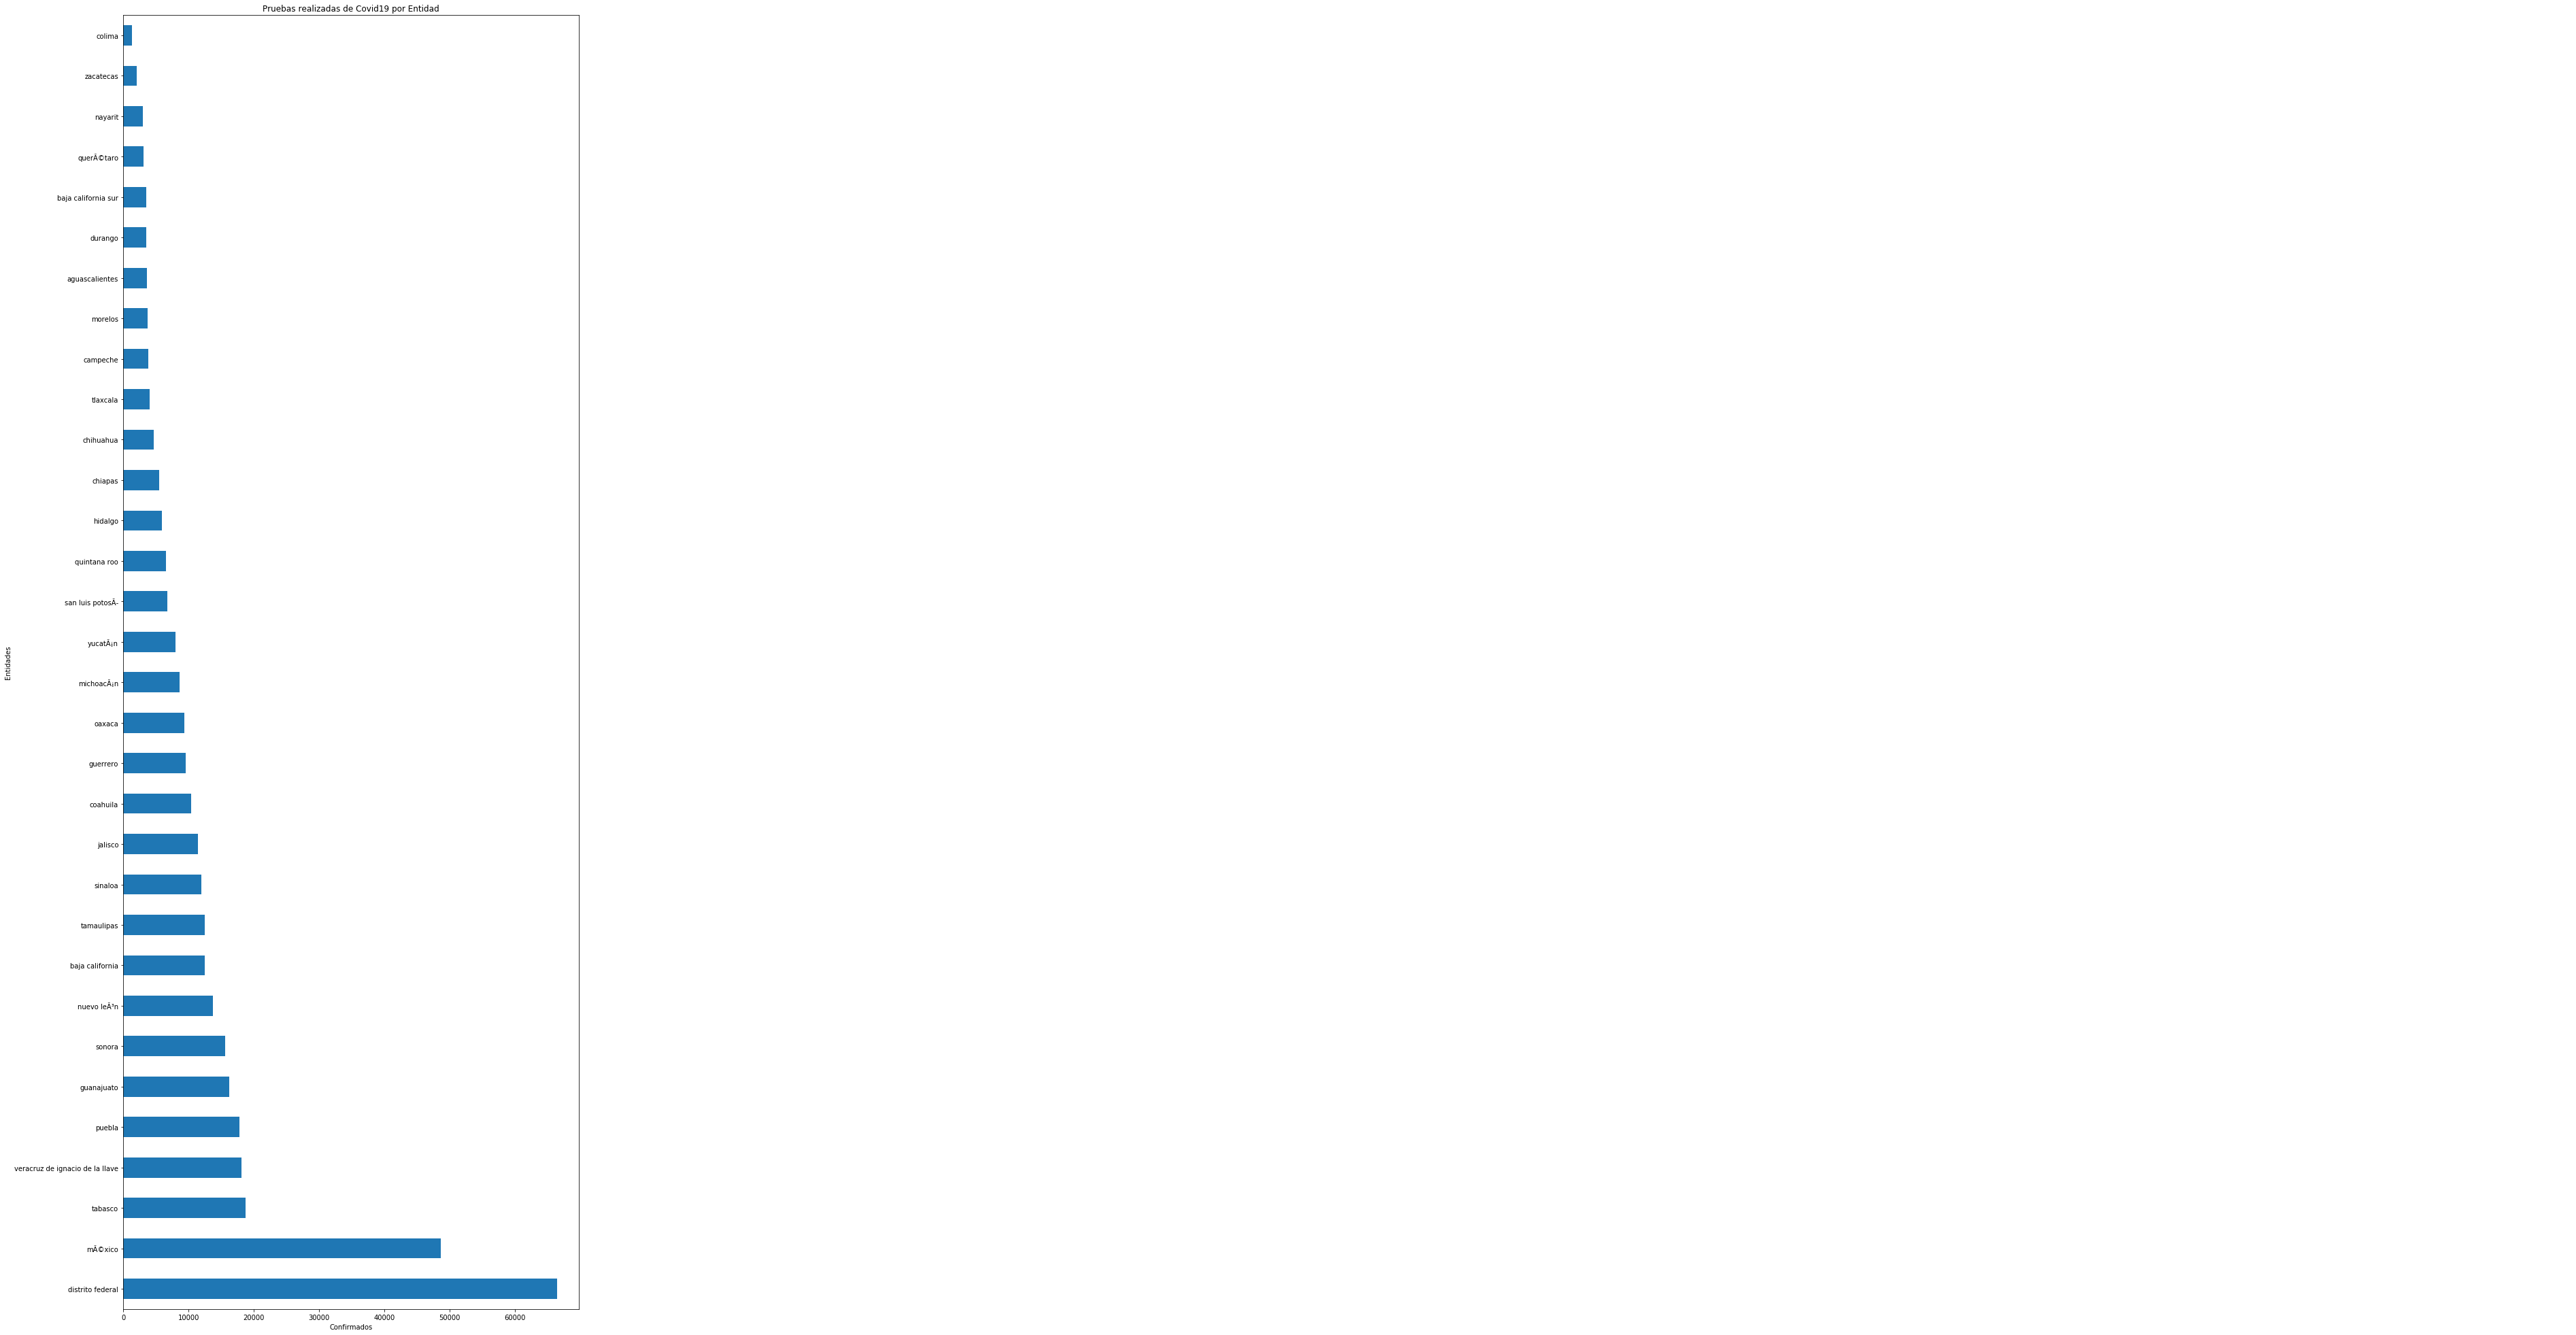

In [29]:
Casos_confirmados.plot(kind='barh', figsize= (12,35))
plt.title('Pruebas realizadas de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(confirmated_covid):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='white')

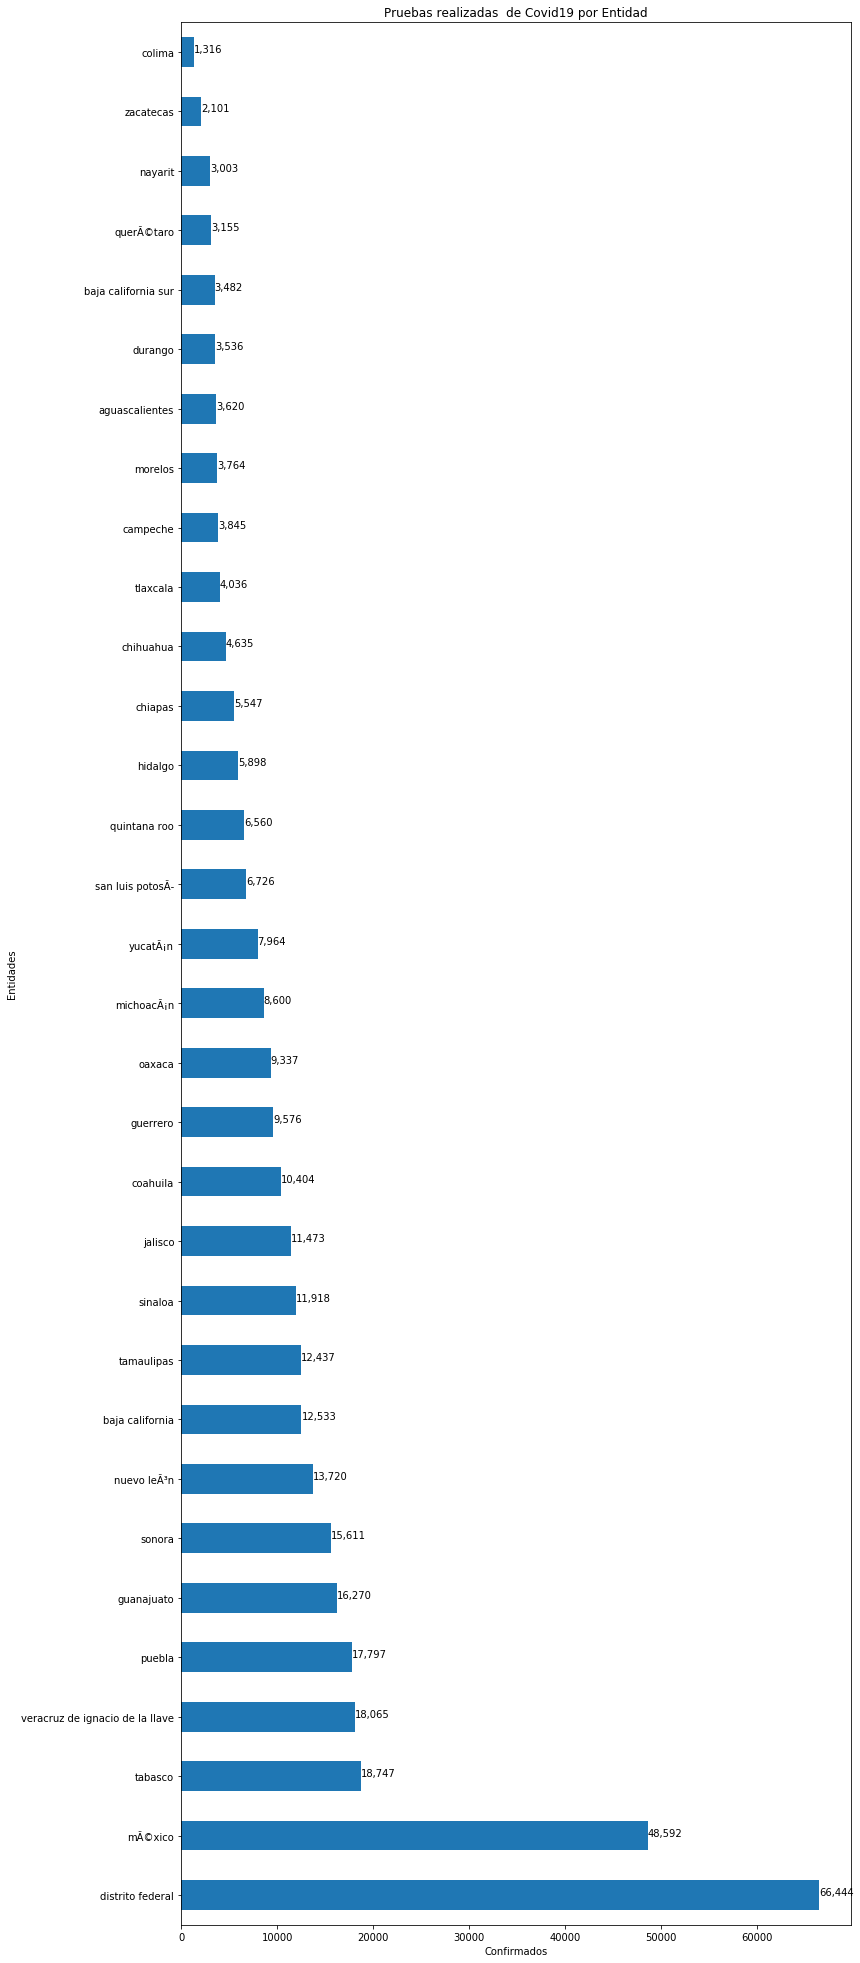

In [33]:
Casos_confirmados.plot(kind='barh', figsize= (12,35))
plt.title('Pruebas realizadas  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(Casos_confirmados):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

In [35]:
df_positivos = data2.groupby('State',axis=0).sum()
df_positivos.head()

,Confirmed
State,
aguascalientes,3620
baja california,12533
baja california sur,3482
campeche,3845
chiapas,5547


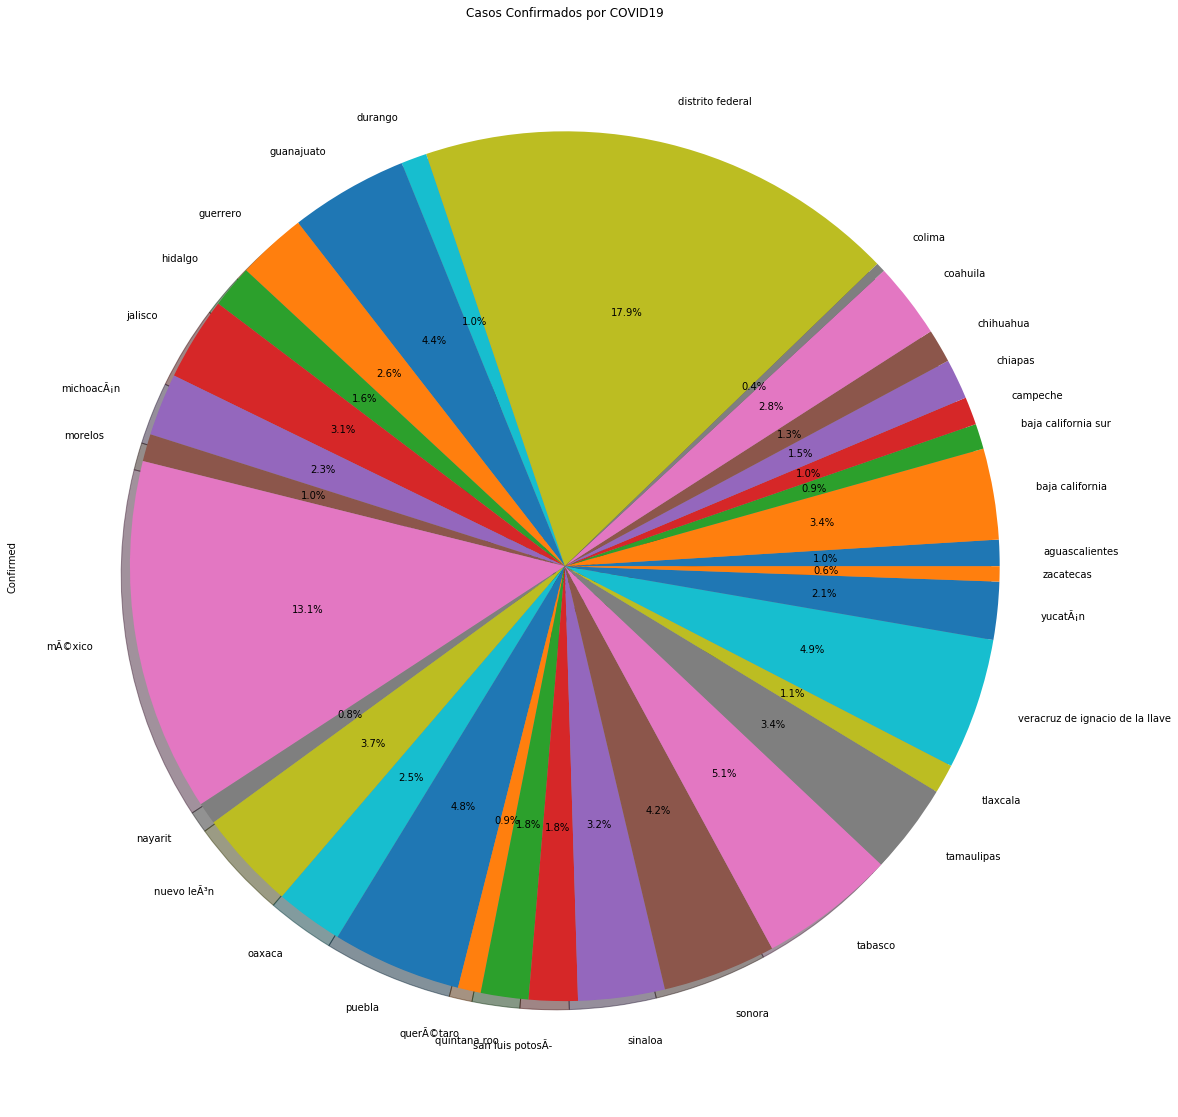

In [36]:
df_positivos['Confirmed'].plot(
    kind='pie',
    figsize = (100,20),
    autopct = '%1.1f%%',
    startangle=0,
    shadow = True
)
plt.title('Casos Confirmados por COVID19')
plt.show()

**SECTORES**

In [39]:
data3=pd.read_csv("SECTOR.csv",encoding='latin1')

print(data3.head())

   CLAVE     DESCRIPCION
0      1       CRUZ ROJA
1      2             DIF
2      3         ESTATAL
3      4            IMSS
4      5  IMSS-BIENESTAR


In [40]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE,ESTADO
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,99,1,97,1,distrito federal
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,1,2,2,99,1,2,1,distrito federal
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,2,1,2,2,99,1,2,0,chihuahua
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,1,2,2,2,2,99,1,97,1,veracruz de ignacio de la llave
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,1,1,2,1,mÃ©xico


In [49]:
data['SECTORES'] = data3['DESCRIPCION']
data['CASOS_CONFIRMADOS'] = data2['Confirmed']

In [50]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE,ESTADO,SECTORES,CASOS_CONFIRMADOS
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,99,1,97,1,distrito federal,CRUZ ROJA,1.0
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,1,2,2,99,1,2,1,distrito federal,DIF,1.0
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,1,2,2,99,1,2,0,chihuahua,ESTATAL,1.0
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,2,2,99,1,97,1,veracruz de ignacio de la llave,IMSS,1.0
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,1,1,2,1,mÃ©xico,IMSS-BIENESTAR,1.0


**PRUEBAS SECTORES**

In [115]:
sectors = 'SECTOR.csv'
df_sector = pd.read_csv(sectors)


In [120]:
df_sector['TOTAL_SECTORES'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_DIABETE_Y_INTUBADO'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & ((data['RESULTADO'] == 1) | (data['DIABETES'] == 1) | (data['INTUBADO'] == 1))]) for x in list(df_sector['CLAVE'])]
porcent = 100

In [121]:
df_sector.head()

,CLAVE,DESCRIPCION,TOTAL_SECTORES,TOTAL_DIABETE_Y_INTUBADO
0,1,CRUZ ROJA,3,3
1,2,DIF,0,2
2,3,ESTATAL,974,1079
3,4,IMSS,23147,26158
4,5,IMSS-BIENESTAR,0,0


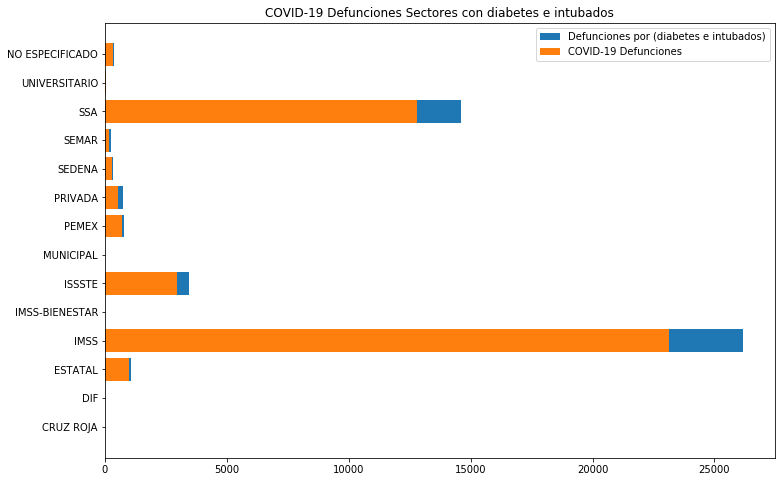

In [128]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('COVID-19 Defunciones Sectores con diabetes e intubados')
ax1.barh(df_sector['DESCRIPCION'], df_sector['TOTAL_DIABETE_Y_INTUBADO']*(porcent/100), align='center', label="Defunciones por (diabetes e intubados)")

ax1.barh(df_sector['DESCRIPCION'], df_sector['TOTAL_SECTORES'], align='center', label="COVID-19 Defunciones")

ax1.legend()


In [129]:
Casos_sectores = data.groupby('ESTADO')['SECTORES'].value_counts()

Casos_sectores.head()

ESTADO            SECTORES     
baja california   UNIVERSITARIO    1
chihuahua         ESTATAL          1
distrito federal  CRUZ ROJA        1
                  DIF              1
jalisco           PRIVADA          1
Name: SECTORES, dtype: int64

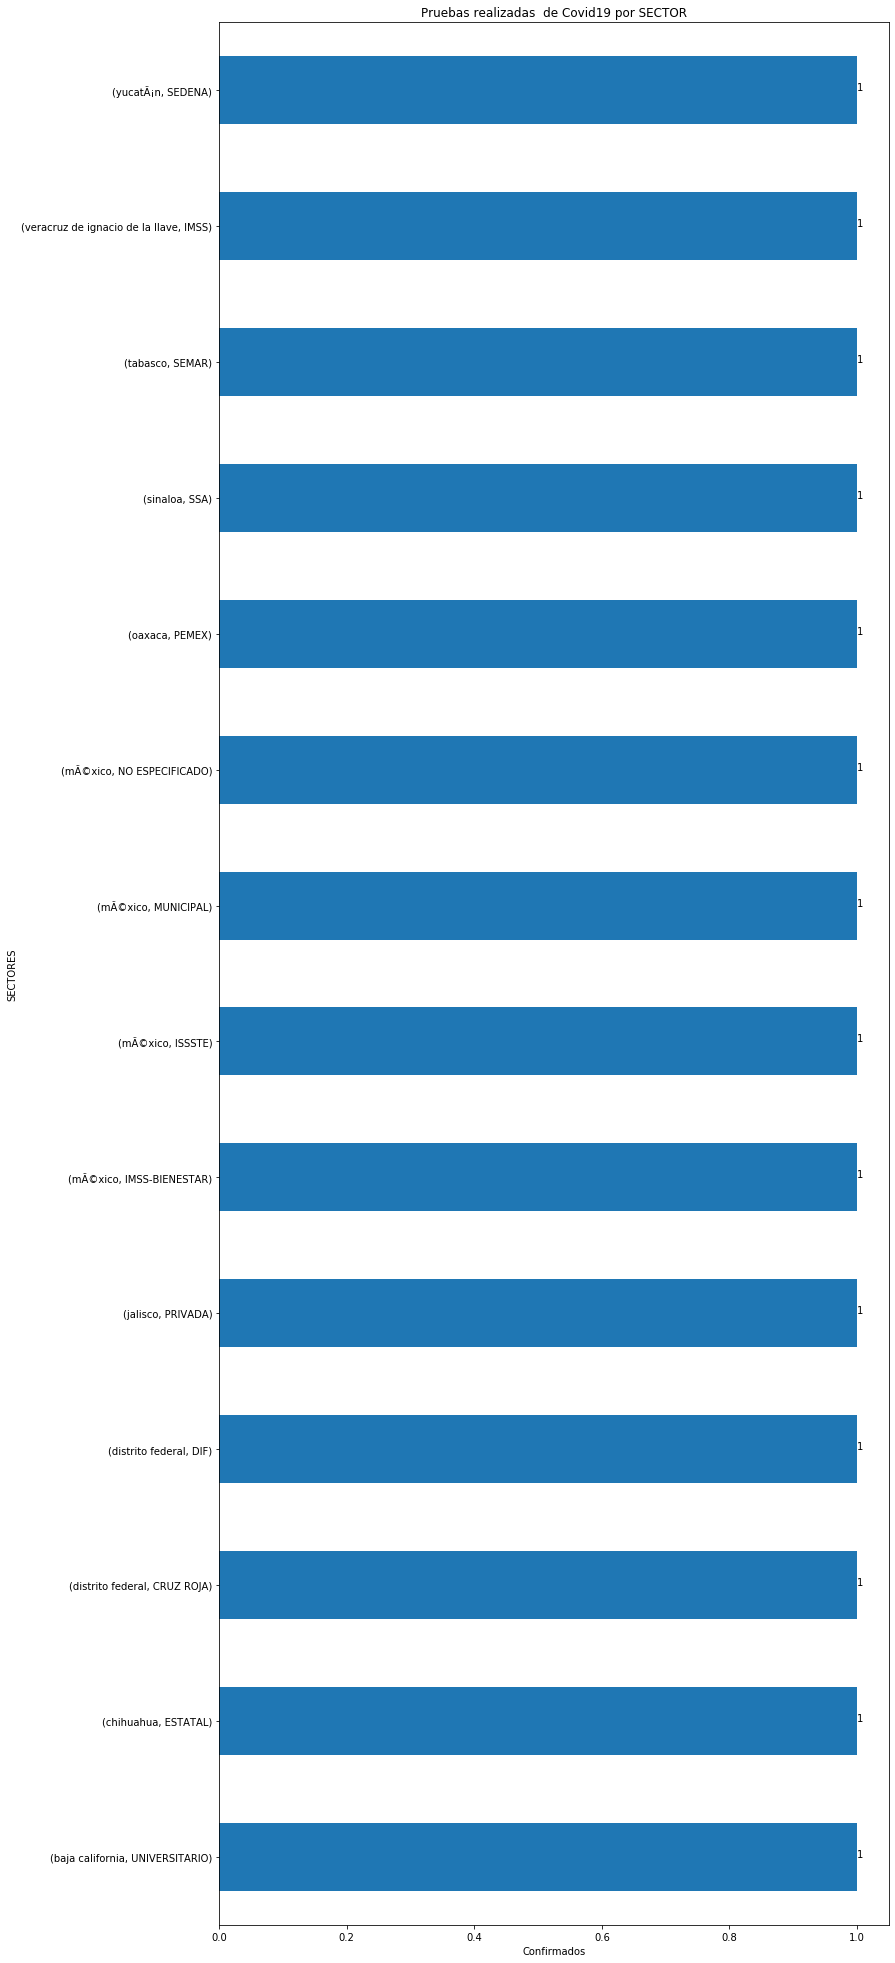

In [130]:
Casos_sectores.plot(kind='barh', figsize= (12,35))
plt.title('Pruebas realizadas  de Covid19 por SECTOR')
plt.ylabel('SECTORES')
plt.xlabel('Confirmados')
for index, value in enumerate(Casos_sectores):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

**Ahora como plus en esta practica agregaremos lo que se realizo en la materia inteligencia artificial arboles de desicion que fue calcular los que sobrevivieron y los que fallecieron**

In [131]:
data['Superviviente'] = data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

**En el siguiente codigo vamos a observar ya datos numericos en "FECHA_DEF"**

In [133]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE,ESTADO,SECTORES,CASOS_CONFIRMADOS,Superviviente
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,99,1,97,1,distrito federal,CRUZ ROJA,1.0,1
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,99,1,2,1,distrito federal,DIF,1.0,1
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,2,99,1,2,0,chihuahua,ESTATAL,1.0,0
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,2,99,1,97,1,veracruz de ignacio de la llave,IMSS,1.0,1
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,1,1,2,1,mÃ©xico,IMSS-BIENESTAR,1.0,1


**Paso 3: Aplicacion de arbol de decisiones**

In [134]:
y_target = data["Superviviente"].values

In [135]:
columns = ["INTUBADO","NEUMONIA", "UCI", "TIPO_PACIENTE","EDAD","SEXO"]
X_input = data[list(columns)].values

In [136]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)

**Evaluacion del Modelo**

In [137]:
clf_train.score(X_input,y_target)

0.9432849633018344

**Paso 4: Visualizar el árbol con datos de si sobrevivio o no sobrevivio**

In [138]:
clasificacion = ['Estado vivo','Estado no vivo']

In [139]:
from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
    f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names=clasificacion)

C:\Users\esemi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


**Creacion de la imagen**

In [140]:
!dot -Tpng covid.dot -o covid.png

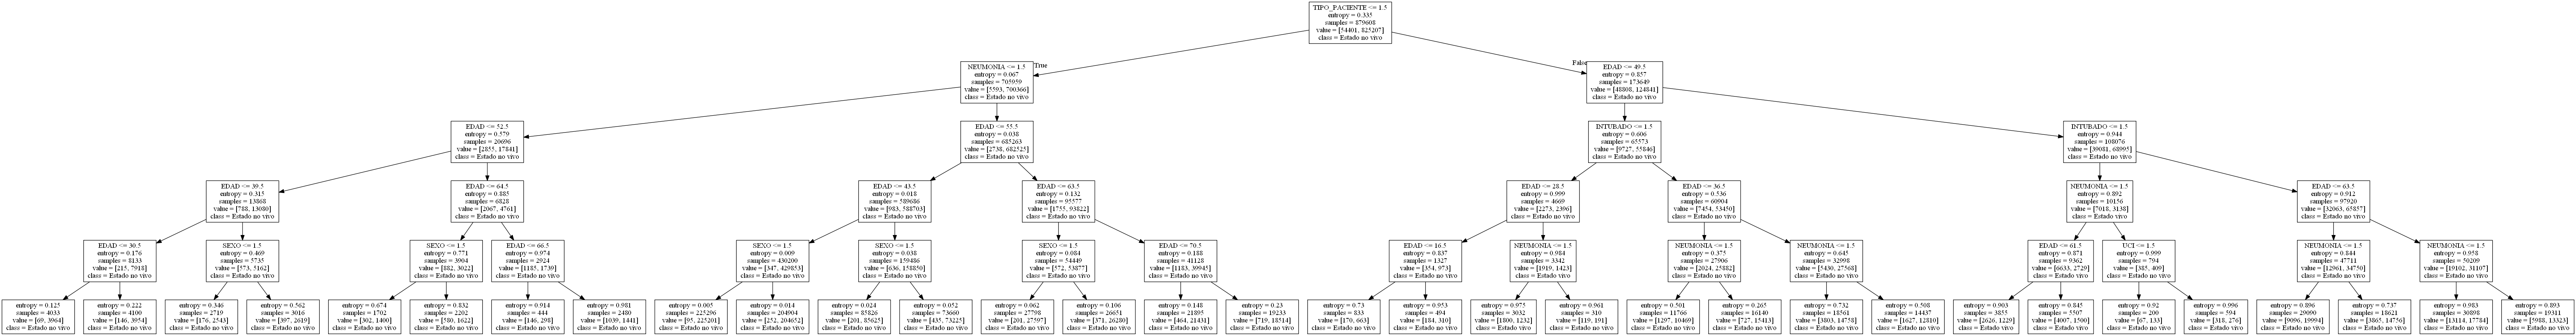

In [141]:
from IPython.display import Image

#display the decison tree graphic
Image("covid.png")

**Arbol de decision con diseño y color**

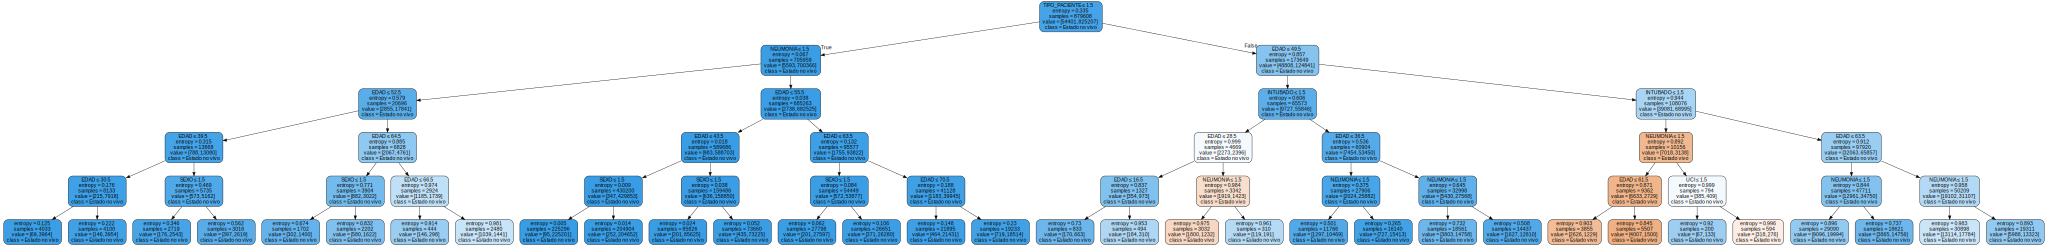

In [142]:

import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('CovidColor1',format='png')
graph

**CONCLUSIONES**